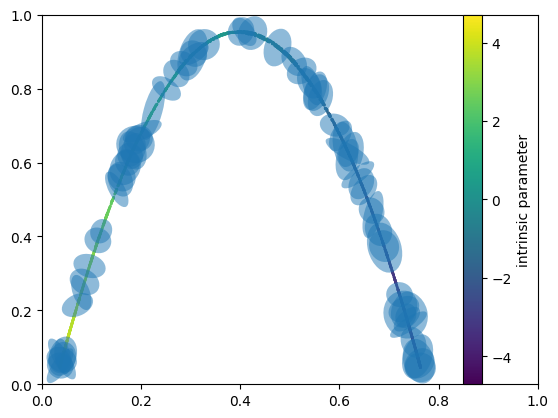

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from src.data.load_data import load_s_curve
from src.linalg.rmetric import RMetric
from src.model.spectral_embedding import SpectralEmbedding
from superman_visualizations.visualizations.psd import plot_eigen_ellipse
from superman_visualizations.visualizations.points import plot_points

n_plot = 70
rng = np.random.RandomState(8675309)
N = 2500

points_coords = load_s_curve(N, random_state=0)
points = points_coords[0]
sp = SpectralEmbedding(0.84, 20, eigen_solver="dense")
emb = sp.fit(points, save=True)

emb_vec = emb.eigenvectors
np_emb_vec = emb_vec.as_nparray()
np_points = points.as_nparray()

rm = RMetric.local(emb_vec, lap=sp.lap_mat)
vec1 = 0
vec2 = 1

f, ax = plt.subplots()
sc, ax = plot_points(f, np_emb_vec, i_param=points_coords[1].as_nparray(), use_dims=[vec1, vec2], size=1)
ax.set_xlabel("vec1")
ax.set_ylabel("vec2")

sample_points = rng.choice(range(N), n_plot, replace = False)

ax.axis('off')
for i in range(n_plot):
    ii = sample_points[i]
    plot_eigen_ellipse(0.0001 * rm.eigenvalues[i][0:2].as_nparray(), rm.eigenvectors[i][0:2].as_nparray(), [np_emb_vec[ii,vec1], np_emb_vec[ii,vec2]] ,ax=ax, edgecolor='none', alpha = 0.5)
plt.show()
plt.close()
